In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import cumfreq

from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
DROPBOX_DIR = r'C:\Users\ande7\Dropbox\Apps\Overleaf\Thesis - Nash Bargaining\Figures'
plots_dir = os.path.join(os.getcwd(), 'Plots')
os.makedirs(plots_dir, exist_ok=True)

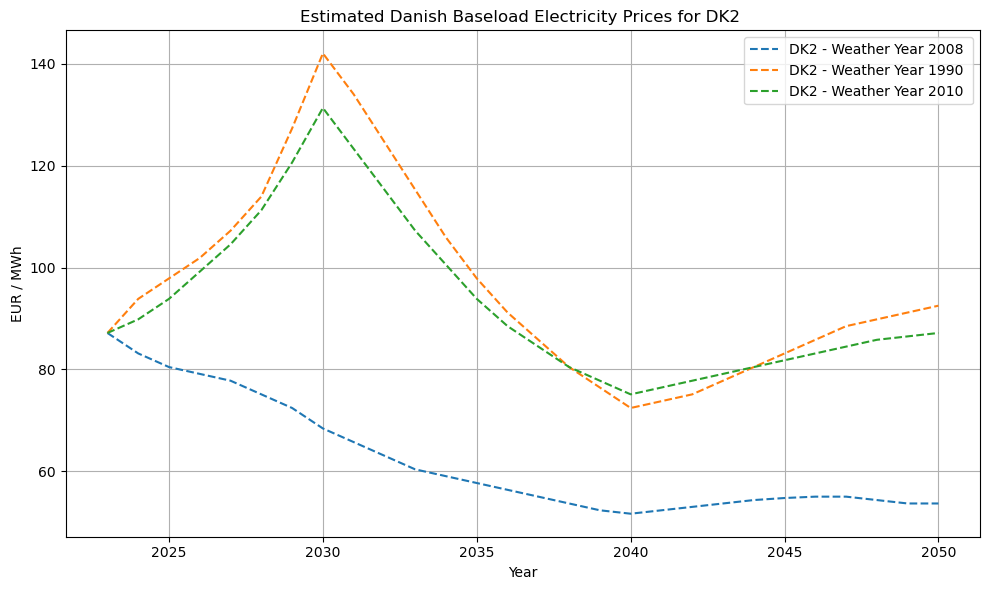

In [2]:
# Plotting of Future Prices and capture prices 


# Years from 2023 to 2050 inclusive
years = list(range(2023, 2051))

dkk_eur= 7.46 # Conversion rate from DKK to EUR

# Approximated dashed‑line values (DKK/MWh)
dk2_normal_2008 = np.array([
    650, 620, 600, 590, 580, 560, 540, 510, 490, 470, 450, 440, 430, 420,
    410, 400, 390, 385, 390, 395, 400, 405, 408, 410, 410, 405, 400, 400
]) / dkk_eur

dk2_klima_1990 = np.array([
    650, 700, 730, 760, 800, 850, 950, 1060, 1000, 930, 860, 790, 730, 680,
    640, 600, 570, 540, 550, 560, 580, 600, 620, 640, 660, 670, 680, 690
]) / dkk_eur

dk2_klima_2010 = np.array([
    650, 670, 700, 740, 780, 830, 900, 980, 920, 860, 800, 750, 700, 660,
    630, 600, 580, 560, 570, 580, 590, 600, 610, 620, 630, 640, 645, 650
]) / dkk_eur

# Prepare a DataFrame for reference
df_price = pd.DataFrame({
    "Year": years,
    "DK2_Normalåret_2008": dk2_normal_2008,
    "DK2_Klimaåret_1990": dk2_klima_1990,
    "DK2_Klimaåret_2010": dk2_klima_2010
})


# Plot the three dashed lines
plt.figure(figsize=(10, 6))
plt.plot(years, dk2_normal_2008, linestyle="--", label="DK2 - Weather Year 2008")
plt.plot(years, dk2_klima_1990, linestyle="--", label="DK2 - Weather Year 1990 ")
plt.plot(years, dk2_klima_2010, linestyle="--", label="DK2 - Weather Year 2010")

plt.xlabel("Year")
plt.ylabel("EUR / MWh")
plt.title("Estimated Danish Baseload Electricity Prices for DK2 ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{DROPBOX_DIR}/DK2_Electricity_Prices.png", dpi=300, bbox_inches='tight')
plt.show()
# Save the figure


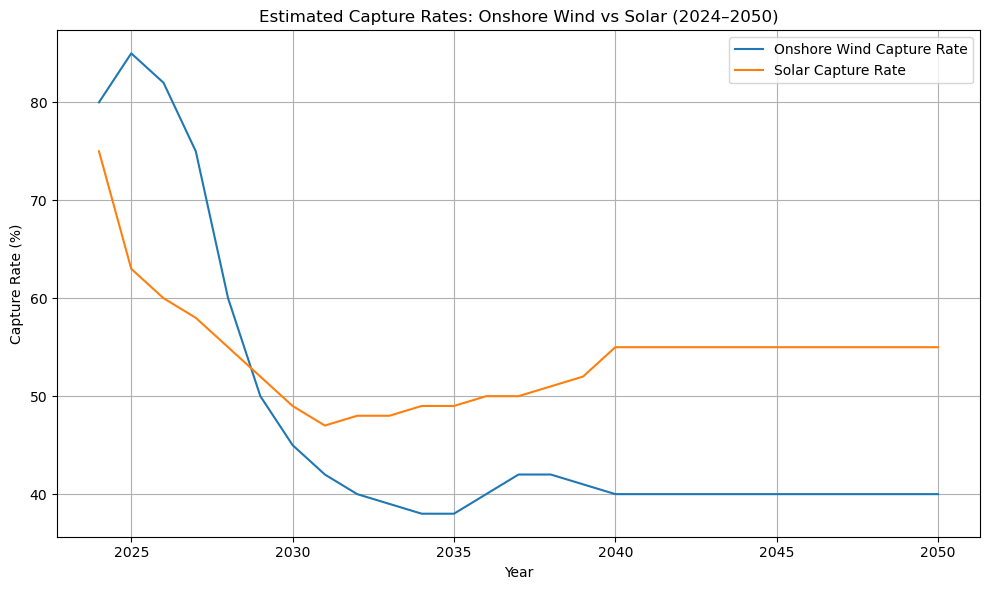

In [3]:

# Years 2024–2050
years = list(range(2024, 2051))

# Approximate capture‑rate values derived by visual inspection
onshore_capture =np.array( [
    80, 85, 82, 75, 60, 50, 45, 42, 40, 39, 38, 38, 40, 42, 42, 41, 40
] + [40] * 10)  # constant after 2040

solar_capture = np.array([
    75, 63, 60, 58, 55, 52, 49, 47, 48, 48, 49, 49, 50, 50, 51, 52, 55
] + [55] * 10 ) # constant after 2040

# Assemble into a DataFrame
df_capture = pd.DataFrame(
    {
        "Year": years,
        "Onshore_Wind_Capture_%": onshore_capture,
        "Solar_Capture_%": solar_capture,
    }
)


# Plot the two series
plt.figure(figsize=(10, 6))
plt.plot(years, onshore_capture, label="Onshore Wind Capture Rate")
plt.plot(years, solar_capture, label="Solar Capture Rate")
plt.xlabel("Year")
plt.ylabel("Capture Rate (%)")
plt.title("Estimated Capture Rates: Onshore Wind vs Solar (2024–2050)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{DROPBOX_DIR}/DK2_Capture_Rates.png", dpi=300, bbox_inches='tight')
plt.show()

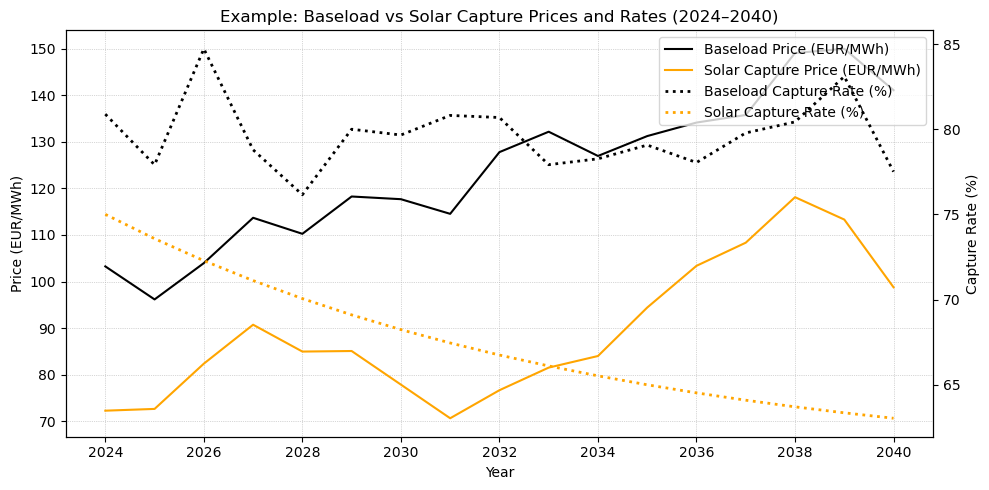

In [4]:
# Example plot: Baseload vs Solar Capture Prices and Rates (2024–2040)

years_example = list(range(2024, 2041))
baseload_price = np.linspace(100, 150, len(years_example)) + np.random.normal(0, 5, len(years_example))
solar_capture_price = baseload_price * (0.7 + 0.1 * np.sin(np.linspace(0, 3*np.pi, len(years_example))))
baseload_capture_rate = np.full(len(years_example), 80) + np.random.normal(0, 2, len(years_example))
solar_capture_rate = 60 + 15 * np.exp(-0.1 * (np.array(years_example) - 2024))

fig, ax1 = plt.subplots(figsize=(10, 5))

# Price lines
ax1.plot(years_example, baseload_price, color="black", label="Baseload Price (EUR/MWh)")
ax1.plot(years_example, solar_capture_price, color="orange", linestyle="-", label="Solar Capture Price (EUR/MWh)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Price (EUR/MWh)")
ax1.set_title("Example: Baseload vs Solar Capture Prices and Rates (2024–2040)")
ax1.grid(True, linestyle=":", linewidth=0.5)

# Second y-axis for capture rates
ax2 = ax1.twinx()
ax2.plot(years_example, baseload_capture_rate, color="black", linestyle=":", linewidth=2, label="Baseload Capture Rate (%)")
ax2.plot(years_example, solar_capture_rate, color="orange", linestyle=":", linewidth=2, label="Solar Capture Rate (%)")
ax2.set_ylabel("Capture Rate (%)", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

plt.tight_layout()
plt.savefig(f"{DROPBOX_DIR}/Example_Baseload_Solar_Capture.png", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# Calculate capture price for onshore wind and solar

# Assume a spot price series for the years 2024–2050 (example: use DK2_Normalåret_2008 for demonstration)
spot_price = df_price["DK2_Normalåret_2008"].iloc[-len(years):].values  # Align years if needed

# Calculate capture prices
onshore_capture_price = np.round(spot_price * df_capture["Onshore_Wind_Capture_%"].values / 100, 2)
solar_capture_price = np.round(spot_price * df_capture["Solar_Capture_%"].values / 100, 2)

# Add to DataFrame for reference
df_capture = pd.DataFrame({
    "Year": years,
    "Spot_Price": spot_price,
    "Onshore_Wind_Capture_%": df_capture["Onshore_Wind_Capture_%"].values,
    "Solar_Capture_%": df_capture["Solar_Capture_%"].values,
    "Onshore_Capture_Price": onshore_capture_price,
    "Solar_Capture_Price": solar_capture_price
})

df_capture.head()

,Year,Spot_Price,Onshore_Wind_Capture_%,Solar_Capture_%,Onshore_Capture_Price,Solar_Capture_Price
0,2024,83.109920,80,75,66.49,62.33
1,2025,80.428954,85,63,68.36,50.67
2,2026,79.088472,82,60,64.85,47.45
3,2027,77.747989,75,58,58.31,45.09
4,2028,75.067024,60,55,45.04,41.29


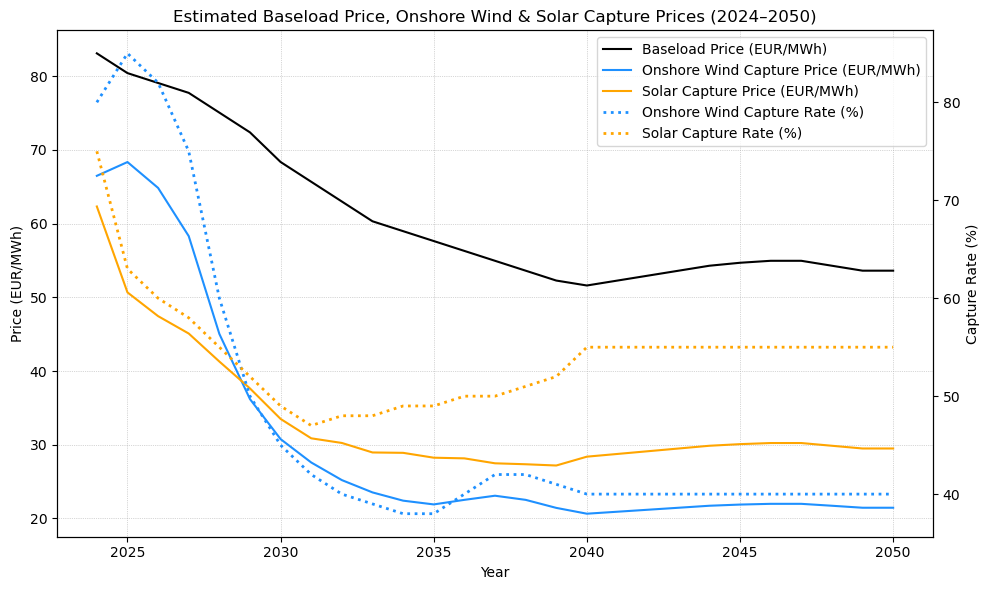

In [6]:
# filepath: untitled:Untitled-1.ipynb?jupyter-notebook
# Plot spot price, onshore wind capture price, and solar capture price with a second axis for capture rate

fig, ax1 = plt.subplots(figsize=(10, 6))

# Price lines
ax1.plot(years, spot_price, color="black", label="Baseload Price (EUR/MWh)")
ax1.plot(years, onshore_capture_price, color="dodgerblue", linestyle="-", label="Onshore Wind Capture Price (EUR/MWh)")
ax1.plot(years, solar_capture_price, color="orange", linestyle="-", label="Solar Capture Price (EUR/MWh)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Price (EUR/MWh)")
ax1.set_title("Estimated Baseload Price, Onshore Wind & Solar Capture Prices (2024–2050)")
ax1.grid(True, linestyle=":", linewidth=0.5)

# Second y-axis for capture rates
ax2 = ax1.twinx()
ax2.plot(years, df_capture["Onshore_Wind_Capture_%"], color="dodgerblue", linestyle=":", linewidth=2, label="Onshore Wind Capture Rate (%)")
ax2.plot(years, df_capture["Solar_Capture_%"], color="orange", linestyle=":", linewidth=2, label="Solar Capture Rate (%)")
ax2.set_ylabel("Capture Rate (%)", color="black")
ax2.tick_params(axis="y", labelcolor="black")

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

plt.tight_layout()
plt.savefig(f"{DROPBOX_DIR}/DK2_Capture_prices.png", dpi=300, bbox_inches='tight')
plt.show()

## PAP and Baseload Production Plots 

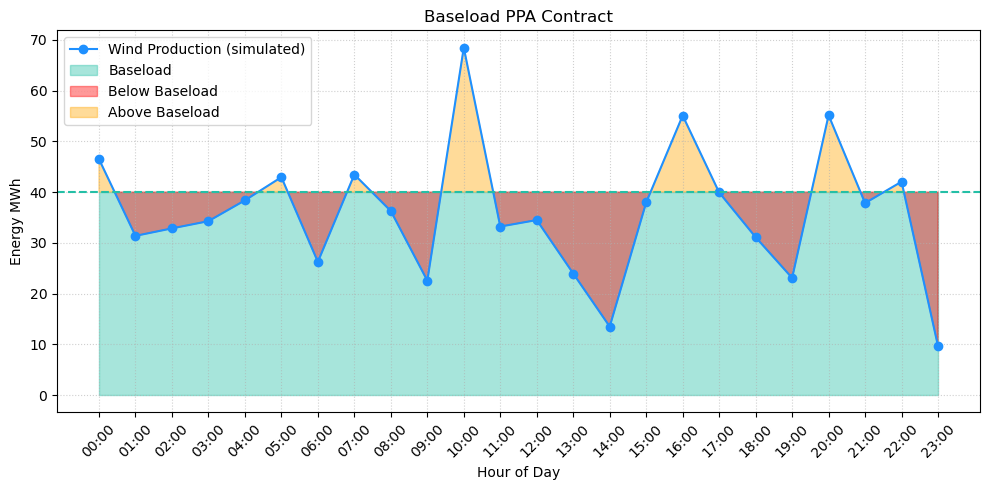

In [ ]:
# Simulate 24 hours of wind production as a normal distribution

hours = np.arange(24)
mean_prod =35 # mean production (arbitrary units)
std_prod = 13   # standard deviation

wind_prod = np.random.normal(loc=mean_prod, scale=std_prod, size=24)
wind_prod = np.clip(wind_prod, 0, None)  # No negative production

baseload = 40  # Baseload value (arbitrary units)

plt.figure(figsize=(10, 5))
plt.plot(hours, wind_prod, label="Wind Production (simulated)", color="dodgerblue", marker="o")
plt.axhline(baseload, color="#24BFA6", linestyle="--", )

# Fill area under baseload
plt.fill_between(hours, 0, baseload, color="#24BFA6", alpha=0.4, label="Baseload")
# Fill below baseload
plt.fill_between(hours, wind_prod, baseload, where=wind_prod < baseload, color="red", alpha=0.4, label="Below Baseload", interpolate= True)
# Fill above baseload
plt.fill_between(hours, wind_prod, baseload, where=wind_prod > baseload, color="orange", alpha=0.4, label="Above Baseload",interpolate = True)

plt.xlabel("Hour of Day")
plt.ylabel("Energy MWh")
plt.title("Baseload PPA Contract")
plt.xticks(hours, [f"{h:02d}:00" for h in hours], rotation=45)
plt.legend()
plt.grid(True, linestyle=":", alpha=0.6)
plt.tight_layout()
#plt.savefig(f"{DROPBOX_DIR}/Baseload_contract.png", dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(plots_dir, "Baseload_contract.png"), dpi=300, bbox_inches='tight')

plt.show()


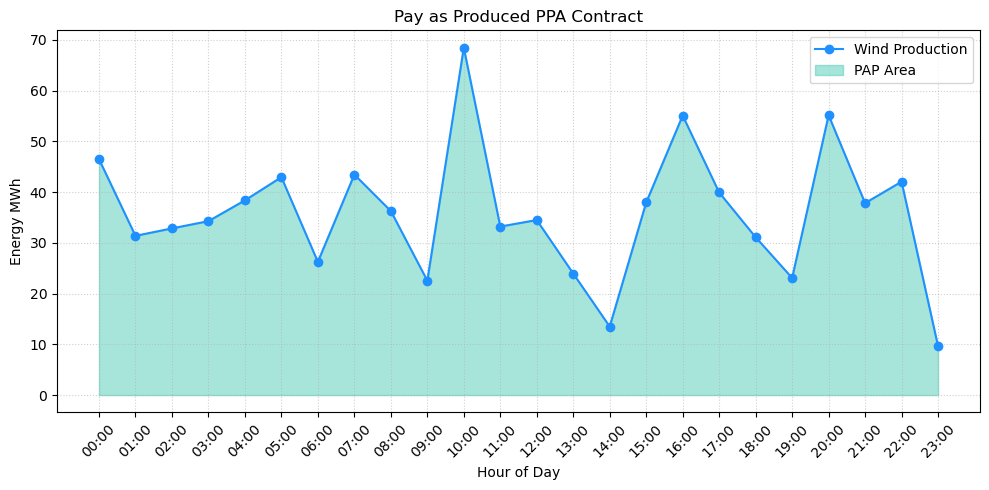

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(hours, wind_prod, label="Wind Production", color="dodgerblue", marker="o")

# Fill area under baseload
plt.fill_between(hours, 0, wind_prod, color="#24BFA6", alpha=0.4, label="PAP Area")

plt.xlabel("Hour of Day")
plt.ylabel("Energy MWh")
plt.title("Pay as Produced PPA Contract")
plt.legend()
plt.grid(True, linestyle=":", alpha=0.6)
plt.xticks(hours, [f"{h:02d}:00" for h in hours], rotation=45)
#plt.savefig(f"{DROPBOX_DIR}/PAP_contract.png", dpi=300, bbox_inches='tight')
plt.savefig(os.path.join(plots_dir, "PAP_contract.png"), dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


## Monte Carlo Simulation Plots

In [2]:
# Import montecarlo simulation results

# Load Data for simulation 

num_scenarios = 50000
time_horizon = 20 #  5,10,20
contract_type = 'Baseload'  # Baseload ,PAP

# Load scenarios from CSV files
scenario_pattern = f"{{type}}_scenarios_{time_horizon}y_{num_scenarios}s.csv"

# Load price scenarios
prices_df = pd.read_csv(f"scenarios/{scenario_pattern.format(type='price')}", index_col=0) # Mio EUR/GWh
prices_df.index = pd.to_datetime(prices_df.index)   

prices_mwh = prices_df * 1000  # Convert from EUR/GWh to EUR/MWh

#prices_mwh = prices_mwh + 0.01*prices_mwh.mean().mean()

# Load production scenarios
prod_df = pd.read_csv(f"scenarios/{scenario_pattern.format(type='production')}", index_col=0) # GWh
prod_df.index = pd.to_datetime(prod_df.index)

# Load capture rate scenarios
CR_df = pd.read_csv(f"scenarios/{scenario_pattern.format(type='capture_rate')}", index_col=0)
CR_df.index = pd.to_datetime(CR_df.index)    # Load load scenarios
load_df = pd.read_csv(f"scenarios/{scenario_pattern.format(type='load')}", index_col=0) # GWh
load_df.index = pd.to_datetime(load_df.index)

LR_df = pd.read_csv(f"scenarios/{scenario_pattern.format(type='load_capture_rate')}", index_col=0) # %
LR_df.index = pd.to_datetime(LR_df.index)

#Net earnings no contract 
net_earnings_no_contract_G = (prices_df * prod_df * CR_df) # Mio EUR
net_earnings_no_contract_L = (-prices_df * load_df * LR_df) # Mio  EUR 

#Capture Prices 
capture_price_G =  prices_mwh * CR_df
capture_price_L = prices_mwh * LR_df

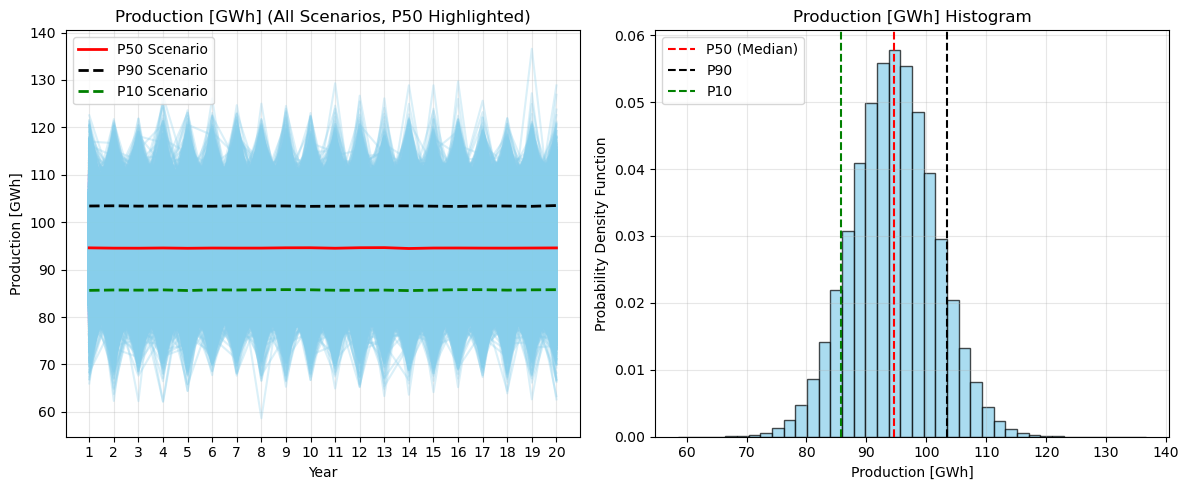

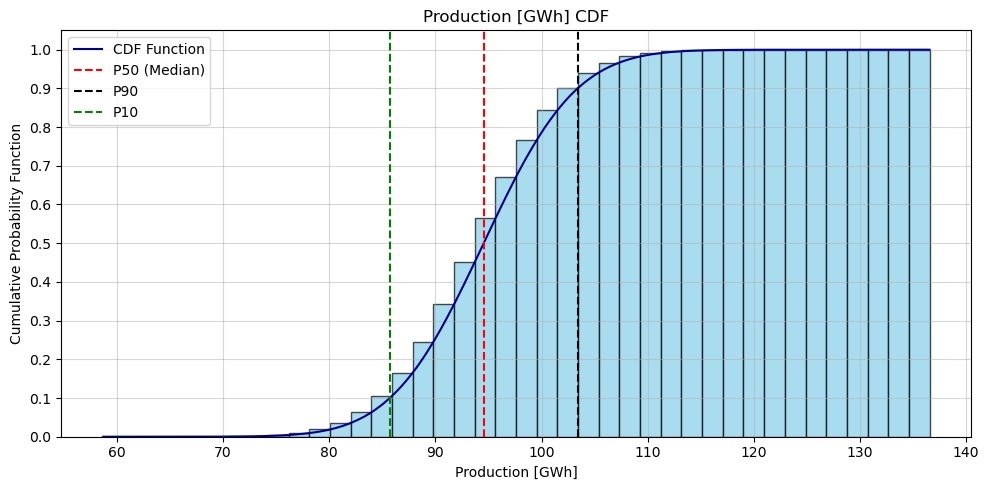

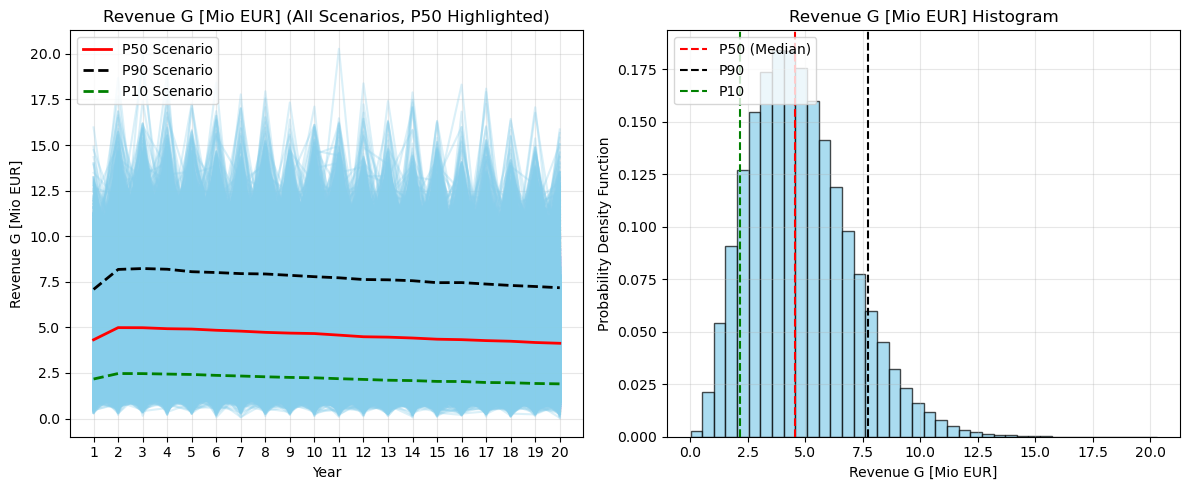

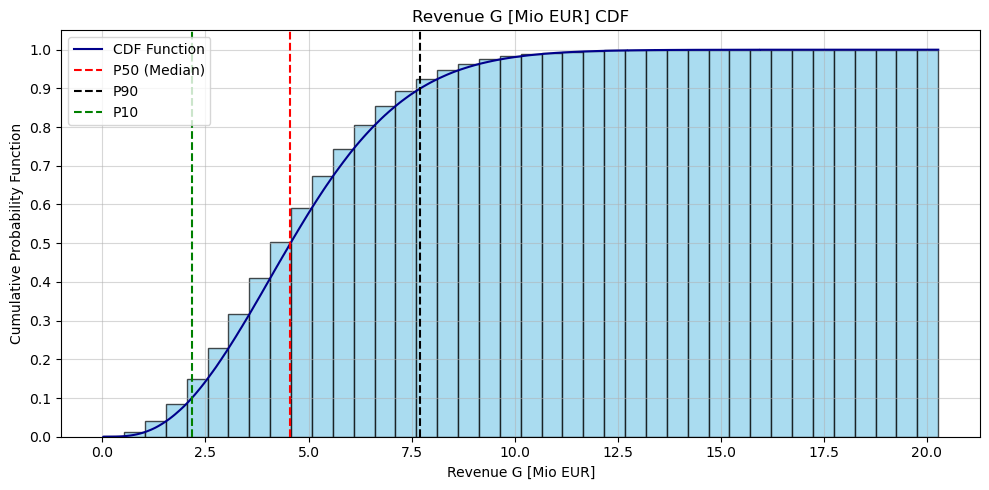

In [3]:
from statsmodels.distributions.empirical_distribution import ECDF
variables = {
        #'Price [EUR/MWh]': prices_mwh,
        'Production [GWh]': prod_df,
        #' Load [GWh]': load_df,
        #'Capture Rate [%]': CR_df,
        #'Load Capture Rate [%]':LR_df,
       # 'Capture Price Wind [EUR/MWh]': capture_price_G,
      #  'Capture Price Load [EUR/MWh]': capture_price_L,
        'Revenue G [Mio EUR]': net_earnings_no_contract_G,
       # 'Revenue L [Mio EUR]': net_earnings_no_contract_L,
        }

for var_name, arr in variables.items():
    arr = np.array(arr)
    x_vals = np.arange(1, arr.shape[0] + 1)  # Start at 1

    # If 2D (T x S), plot all scenarios
        # Line plot of all scenarios
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    for s in range(arr.shape[1]):
        plt.plot(x_vals,arr[:, s], color='skyblue', alpha=0.3)
    # Highlight P50 scenario
    scenario_medians = np.percentile(arr,50, axis=1)
    scenario_p10 = np.percentile(arr,10, axis=1)

    scenario_p90= np.percentile(arr,90, axis=1)

    e = ECDF(arr.flatten())



    plt.plot(x_vals,scenario_medians, color='red', linewidth=2, label='P50 Scenario')
    plt.plot(x_vals,scenario_p90, color='black',linestyle="--", linewidth=2, label='P90 Scenario')
    plt.plot(x_vals,scenario_p10, color='green',linestyle="--", linewidth=2, label='P10 Scenario')
    plt.title(f'{var_name} (All Scenarios, P50 Highlighted)')
    plt.xlabel('Year')
    plt.ylabel(var_name)
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(x_vals)  # Show all integer ticks

  
    # Histogram of all values
    plt.subplot(1, 2, 2)
    plt.hist(arr.flatten(), bins=40, color='skyblue',density=True, edgecolor='black', alpha=0.7)
    plt.axvline(np.median(arr.flatten()), color='red', linestyle='--', label='P50 (Median)')
    plt.axvline(np.percentile(arr.flatten(), 90), color='black', linestyle='--', label='P90')
    plt.axvline(np.percentile(arr.flatten(), 10), color='green', linestyle='--', label='P10')
    plt.title(f'{var_name} Histogram')
    plt.xlabel(var_name)
    plt.ylabel('Probability Density Function')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Make a cumulative distribution plot
    plt.figure(figsize=(10, 5))
    plt.step(e.x, e.y, color='darkblue', label ="CDF Function")
    plt.hist(arr.flatten(), bins=40,cumulative=True,density=True, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(np.median(arr.flatten()), color='red', linestyle='--', label='P50 (Median)')
    plt.axvline(np.percentile(arr.flatten(), 90), color='black', linestyle='--', label='P90')
    plt.axvline(np.percentile(arr.flatten(), 10), color='green', linestyle='--', label='P10')
    plt.yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks from 0 to 1 with step of 0.1
    plt.xlabel(var_name)
    plt.ylabel('Cumulative Probability Function')
    plt.legend(loc='upper left')

    plt.title(f'{var_name} CDF')
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    plt.show()

In [5]:
summary_vars = {
    'Price [EUR/MWh]': prices_mwh,
    'Capture Price Wind [EUR/MWh]': capture_price_G,
    'Capture Price Load [EUR/MWh]': capture_price_L,
    'Production [GWh/year]': prod_df,
    'Production [MWh]': prod_df * 1000 / 8760,  # Convert GWh to MWh
    'Load [GWh/year]': load_df,
    'Capture Rate [%]': CR_df*100,
    'Load Capture Rate [%]': LR_df*100,

}

# Compute statistics for each variable
stats = []
for name, arr in summary_vars.items():
    arr_flat = np.array(arr).flatten()
    stats.append({
        'Variable': name,
        'Mean': np.mean(arr_flat),
        'Std': np.std(arr_flat),
        'P5': np.percentile(arr_flat,5),
        'P50': np.median(arr_flat),
        'P90': np.percentile(arr_flat,90),
        'P95': np.percentile(arr_flat, 95),
    })

summary_df = pd.DataFrame(stats).round(2)
summary_df = summary_df.set_index('Variable')
display(summary_df)

# Split into three tables : One for price, one for production and one for capture rate 

,Mean,Std,P5,P50,P90,P95
Variable,,,,,,
Price [EUR/MWh],95.65,22.82,64.40,92.60,125.33,137.03
Capture Price Wind [EUR/MWh],57.18,16.53,34.94,54.79,78.62,87.53
Capture Price Load [EUR/MWh],99.61,23.94,66.82,96.44,130.60,143.05
Production [GWh/year],44.26,89.66,4.12,4.13,262.80,262.80
Production [MWh],5.05,10.24,0.47,0.47,30.00,30.00
Load [GWh/year],129.80,23.36,83.68,136.87,150.73,151.96
Capture Rate [%],59.68,8.79,46.05,59.18,71.28,74.95
Load Capture Rate [%],104.15,3.11,98.96,104.20,108.12,109.22


In [12]:
total_revenue = net_earnings_no_contract_G.sum(axis=0)
threshold = np.percentile(total_revenue, 5)
worst_mask = total_revenue <= threshold

prices_mwh.iloc[:]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
year,,,,,,,,,,,,,,,,,,,,,
2025-12-31,82.716073,79.681029,105.989613,107.296705,83.772825,110.466800,73.261697,60.856865,65.062394,88.970266,...,85.218003,106.456030,120.573840,123.992050,75.269752,104.281849,110.713636,132.855941,93.444363,94.679501
2026-12-31,95.551379,119.636753,113.600679,85.472344,85.070191,83.154759,83.129853,99.227548,105.201288,84.183459,...,88.543532,102.001899,87.468056,131.611574,66.744198,116.572491,81.416531,120.286642,67.417513,84.673758
2027-12-31,62.111029,97.960006,89.346350,140.099620,90.354309,63.810818,96.521444,102.667598,122.052518,100.245329,...,85.808144,118.049373,114.035441,121.819388,86.775741,140.566017,81.741421,105.991868,65.184188,81.356456
2028-12-31,79.350613,76.964119,76.924543,77.878946,100.616748,109.299219,130.912502,89.947283,75.270223,120.831656,...,90.127838,100.797098,103.395768,95.198842,56.203258,81.345613,96.402348,143.487752,95.447909,62.576270
2029-12-31,66.280243,82.096413,81.667867,128.658974,137.631703,79.460765,96.031113,89.290142,53.648618,74.702734,...,96.469458,102.554163,108.099287,68.529684,108.752432,71.605523,137.250079,67.282823,95.888823,79.901307
2030-12-31,66.557137,124.969914,120.726103,63.013297,80.878518,106.423976,151.729715,80.402077,107.479067,115.114678,...,110.193050,84.007263,59.893640,167.230751,82.731666,80.221887,83.612683,68.629681,93.818367,71.955256
2031-12-31,79.646378,67.405903,64.467526,91.730142,141.384927,106.456419,116.917670,124.296250,102.171658,95.894007,...,85.859554,66.478916,114.183686,77.315188,141.565904,123.668456,86.317794,102.200602,110.548132,158.910665
2032-12-31,80.495557,120.644886,98.348145,83.741097,86.799053,85.778041,130.662896,69.292524,66.694105,132.332565,...,92.958435,113.188391,94.067793,111.335879,80.326354,68.036027,151.860730,82.313888,70.313521,61.160964
2033-12-31,69.413572,111.548235,112.167897,68.090755,104.544645,90.409453,91.611054,82.030413,102.021182,97.949934,...,62.740378,87.652032,120.587084,101.533838,69.179672,189.426888,75.395692,125.165348,54.412317,70.990863


In [14]:


mean_price_worst = prices_mwh.loc[:, worst_mask].mean().mean()
mean_prod_worst = prod_df.loc[:, worst_mask].mean().mean()
mean_cr_worst = CR_df.loc[:, worst_mask].mean().mean()
mean_capture_price_wind_worst = capture_price_G.loc[:, worst_mask].mean().mean()

mean_price_all = prices_mwh.mean().mean()
mean_prod_all = prod_df.mean().mean()
mean_cr_all = CR_df.mean().mean()
mean_capture_price_all = capture_price_G.mean().mean()

print("Worst 5% scenarios (mean values):")
print(f"  Price [EUR/MWh]: {mean_price_worst:.2f} (all: {mean_price_all:.2f})")
print(f"  Capture Price Wind [EUR/MWh]: {mean_capture_price_wind_worst:.2f} (all: {mean_capture_price_all:.2f})")
print(f"  Production [GWh]: {mean_prod_worst:.2f} (all: {mean_prod_all:.2f})")
print(f"  Capture Rate [%]: {mean_cr_worst*100:.2f} (all: {mean_cr_all*100:.2f})")

print("\nRelative drop in worst 5% vs all scenarios:")
print(f"  Price: {100*(mean_price_worst-mean_price_all)/mean_price_all:.1f}%")
print(f"  Capture Price Wind: {100*(mean_capture_price_wind_worst-mean_capture_price_all)/mean_capture_price_all:.1f}%")
print(f"  Production: {100*(mean_prod_worst-mean_prod_all)/mean_prod_all:.1f}%")
print(f"  Capture Rate: {100*(mean_cr_worst-mean_cr_all)/mean_cr_all:.1f}%")


Worst 5% scenarios (mean values):
  Price [EUR/MWh]: 88.16 (all: 95.83)
  Capture Price Wind [EUR/MWh]: 48.84 (all: 56.07)
  Production [GWh]: 98.03 (all: 98.72)
  Capture Rate [%]: 55.62 (all: 58.53)

Relative drop in worst 5% vs all scenarios:
  Price: -8.0%
  Capture Price Wind: -12.9%
  Production: -0.7%
  Capture Rate: -5.0%


# Earning Statistics (CVar Risk Aversion)

In [ ]:
# load Earnings for Risk Aversion 

# Generator Risk Aversion to Consider 
AG = 0.5 # 0.1, 0.5, 0.9
fixed_AL = 0.5

Earnings_df = pd.read_csv(f'Results/earnings_sensitivity_{contract_type}_{time_horizon}y_{num_scenarios}.csv', index_col=0)


filtered = Earnings_df[Earnings_df["A_G"] == 0.5]
contract_stats = filtered.groupby("A_L")[['Revenue_G', 'Revenue_L']].agg(['mean', 'std']).round(2)
contract_stats.columns = ['Avg. Rev. G', 'Std. Rev. G', 'Avg. Rev. L', 'Std. Rev. L']

# Compute statistics for no contract case
# If you have arrays: net_earnings_no_contract_G and net_earnings_no_contract_L (shape: T x S)
# We'll flatten and compute overall mean/std for comparison (since no A_L dimension)

net_earnings_no_contract_G_year = net_earnings_no_contract_G.sum(axis=0)  # Sum over time to get total earnings for each scenario
net_earnings_no_contract_L_year = net_earnings_no_contract_L.sum(axis=0)  # Sum over time to get total earnings for each scenario


base_rev_df = pd.DataFrame({
    'Type': ['No Contract'],
    'Avg. Rev. G': [np.mean(net_earnings_no_contract_G_year)],
    'Std. Rev. G': [np.std(net_earnings_no_contract_G_year)],
    'Avg. Rev. L': [np.mean(net_earnings_no_contract_L_year)],
    'Std. Rev. L': [np.std(net_earnings_no_contract_L_year)]
}).round(2)


contract_stats = contract_stats.reset_index()
contract_stats['Type'] = contract_type
contract_stats = contract_stats[['Type', 'A_L', 'Avg. Rev. G', 'Std. Rev. G', 'Avg. Rev. L', 'Std. Rev. L']]

# Separate base revenue from the main table
# Rename main table for clarity
final_df = pd.concat([ base_rev_df,contract_stats], ignore_index=True).fillna(0)
final_df = final_df[['Type', 'A_L', 'Avg. Rev. G', 'Std. Rev. G', 'Avg. Rev. L', 'Std. Rev. L']]
# Display final table
print(final_df)

FileNotFoundError: [Errno 2] No such file or directory: 'Results/earnings_sensitivity_Baseload_20y_1000.csv'

# Earning Statistics (Negotiation Power)

In [ ]:
Earnings_df_nego = pd.read_csv(f'Results/negotiation_earnings_sensitivity_{contract_type}_{time_horizon}y_{num_scenarios}.csv', index_col=0)

Earnings_df_nego = Earnings_df_nego.round(2)
base_rev_df_nego = pd.DataFrame({
    'Negotiation Power (G)': ['No Contract'],
    'Avg. Rev. G': [np.mean(net_earnings_no_contract_G_year)],
    'Std. Rev. G': [np.std(net_earnings_no_contract_G_year)],
    'Avg. Rev. L': [np.mean(net_earnings_no_contract_L_year)],
    'Std. Rev. L': [np.std(net_earnings_no_contract_L_year)]
}).round(2)

unique_beta_g = Earnings_df_nego["Beta_G"].unique()

# Get three evenly spaced positions
positions = np.linspace(1, len(unique_beta_g)-2,3,dtype=int)
selected_beta_g = unique_beta_g[positions]

# Filter the DataFrame for these Beta_G values
df_filtered = Earnings_df_nego[Earnings_df_nego["Beta_G"].isin(selected_beta_g)]

contract_stats = df_filtered.groupby("Beta_G")[['Revenue_G', 'Revenue_L']].agg(['mean', 'std']).round(2)
contract_stats.columns = ['Avg. Rev. G', 'Std. Rev. G', 'Avg. Rev. L', 'Std. Rev. L']
contract_stats = contract_stats.reset_index()
contract_stats = contract_stats.rename(columns={'Beta_G': 'Negotiation Power (G)'})


final_df = pd.concat([ base_rev_df_nego,contract_stats], ignore_index=True).fillna(0)
print(final_df)



  Negotiation Power (G)  Avg. Rev. G  Std. Rev. G  Avg. Rev. L  Std. Rev. L
0           No Contract        27.66         3.94       -73.03         8.23
1                   0.2        31.10         0.99       -54.76         3.02
2                   0.6        43.28         1.38       -66.95         2.96
3                   0.8        49.37         1.58       -73.03         2.96


# Elasticity

In [ ]:
df_production = pd.read_csv(f'Results/production_sensitivity_{contract_type}_{time_horizon}y_{num_scenarios}.csv', index_col=0)
df_production

,ProductionFactor,Avg_Production,StrikePrice,ContractAmount,Utility_G,Utility_L,ThreatPoint_G,ThreatPoint_L,Nash_Product,Gamma
0,0.97,95.794301,81.502812,30.0,37.701137,-67.881519,23.409880,-82.57812,210.032907,1.0
1,0.98,96.781871,81.504907,30.0,38.090788,-67.734646,23.651219,-82.57812,214.333365,1.0
2,0.99,97.769441,81.501035,30.0,38.477641,-67.585061,23.892558,-82.57812,218.675017,1.0
3,1.00,98.757011,81.497240,30.0,38.864495,-67.435476,24.133897,-82.57812,223.060202,1.0
4,1.01,99.744581,81.493521,30.0,39.251348,-67.285891,24.375236,-82.57812,227.488921,1.0
5,1.02,100.732151,81.489874,30.0,39.638202,-67.136306,24.616575,-82.57812,231.961173,1.0
6,1.03,101.719722,81.486298,30.0,40.025055,-66.986721,24.857914,-82.57812,236.476959,1.0


In [ ]:
df_production


,ProductionFactor,Avg_Production,StrikePrice,ContractAmount,Utility_G,Utility_L,ThreatPoint_G,ThreatPoint_L,Nash_Product,Gamma,dProd,dStrike,dUG,Elasticity_Strike_Prod,Elasticity_UG_Prod
0,0.97,95.794301,81.502812,30.0,37.701137,-67.881519,23.409880,-82.57812,210.032907,1.0,NaN,NaN,NaN,NaN,NaN
1,0.98,96.781871,81.504907,30.0,38.090788,-67.734646,23.651219,-82.57812,214.333365,1.0,0.010309,0.000026,0.010335,0.002493,1.002519
2,0.99,97.769441,81.501035,30.0,38.477641,-67.585061,23.892558,-82.57812,218.675017,1.0,0.010204,-0.000048,0.010156,-0.004656,0.995297
3,1.00,98.757011,81.497240,30.0,38.864495,-67.435476,24.133897,-82.57812,223.060202,1.0,0.010101,-0.000047,0.010054,-0.004609,0.995344
4,1.01,99.744581,81.493521,30.0,39.251348,-67.285891,24.375236,-82.57812,227.488921,1.0,0.010000,-0.000046,0.009954,-0.004564,0.995390
5,1.02,100.732151,81.489874,30.0,39.638202,-67.136306,24.616575,-82.57812,231.961173,1.0,0.009901,-0.000045,0.009856,-0.004520,0.995436
6,1.03,101.719722,81.486298,30.0,40.025055,-66.986721,24.857914,-82.57812,236.476959,1.0,0.009804,-0.000044,0.009760,-0.004476,0.995480


In [ ]:
df_production['dProd'] = df_production['ProductionFactor'].pct_change() *100
df_production['dStrike'] = df_production['StrikePrice'].pct_change() *100
df_production['dUG'] = df_production['Utility_G'].pct_change() *100

# Elasticity of Strike Price w.r.t. Production Factor
df_production['Elasticity_Strike_Prod'] = df_production['dStrike'] / df_production['dProd'] 

# Elasticity of Utility G w.r.t. Production Factor
df_production['Elasticity_UG_Prod'] = df_production['dUG'] / df_production['dProd']

df_production['Elasticity_UG_Prod'] = df_production['dUG'] / df_production['dProd']

# Display the elasticity columns
df_production

,ProductionFactor,Avg_Production,StrikePrice,ContractAmount,Utility_G,Utility_L,ThreatPoint_G,ThreatPoint_L,Nash_Product,Gamma,dProd,dStrike,dUG,Elasticity_Strike_Prod,Elasticity_UG_Prod
0,0.97,95.794301,81.502812,30.0,37.701137,-67.881519,23.409880,-82.57812,210.032907,1.0,NaN,NaN,NaN,NaN,NaN
1,0.98,96.781871,81.504907,30.0,38.090788,-67.734646,23.651219,-82.57812,214.333365,1.0,1.030928,0.002570,1.033525,0.002493,1.002519
2,0.99,97.769441,81.501035,30.0,38.477641,-67.585061,23.892558,-82.57812,218.675017,1.0,1.020408,-0.004751,1.015609,-0.004656,0.995297
3,1.00,98.757011,81.497240,30.0,38.864495,-67.435476,24.133897,-82.57812,223.060202,1.0,1.010101,-0.004656,1.005398,-0.004609,0.995344
4,1.01,99.744581,81.493521,30.0,39.251348,-67.285891,24.375236,-82.57812,227.488921,1.0,1.000000,-0.004564,0.995390,-0.004564,0.995390
5,1.02,100.732151,81.489874,30.0,39.638202,-67.136306,24.616575,-82.57812,231.961173,1.0,0.990099,-0.004475,0.985580,-0.004520,0.995436
6,1.03,101.719722,81.486298,30.0,40.025055,-66.986721,24.857914,-82.57812,236.476959,1.0,0.980392,-0.004388,0.975961,-0.004476,0.995480


In [ ]:
elasticity_strike_prod = df_production['Elasticity_Strike_Prod'].mean(skipna=True)
elasticity_ug_prod = df_production['Elasticity_UG_Prod'].mean(skipna=True)
print(f"Average elasticity of Strike Price w.r.t. Production Factor: {elasticity_strike_prod:.3f}")
print(f"Average elasticity of Utility G w.r.t. Production Factor: {elasticity_ug_prod:.3f}")

Average elasticity of Strike Price w.r.t. Production Factor: -0.003
Average elasticity of Utility G w.r.t. Production Factor: 0.997


In [ ]:
df_production

,ProductionFactor,Avg_Production,StrikePrice,ContractAmount,Utility_G,Utility_L,ThreatPoint_G,ThreatPoint_L,Nash_Product,Gamma,dProd,dStrike,dUG,Elasticity_Strike_Prod,Elasticity_UG_Prod
0,0.97,95.794301,81.502812,30.0,37.701137,-67.881519,23.409880,-82.57812,210.032907,1.0,NaN,NaN,NaN,NaN,NaN
1,0.98,96.781871,81.504907,30.0,38.090788,-67.734646,23.651219,-82.57812,214.333365,1.0,1.030928,0.002570,1.033525,0.002506,1.002506
2,0.99,97.769441,81.501035,30.0,38.477641,-67.585061,23.892558,-82.57812,218.675017,1.0,1.020408,-0.004751,1.015609,-0.004679,0.995321
3,1.00,98.757011,81.497240,30.0,38.864495,-67.435476,24.133897,-82.57812,223.060202,1.0,1.010101,-0.004656,1.005398,-0.004633,0.995367
4,1.01,99.744581,81.493521,30.0,39.251348,-67.285891,24.375236,-82.57812,227.488921,1.0,1.000000,-0.004564,0.995390,-0.004587,0.995413
5,1.02,100.732151,81.489874,30.0,39.638202,-67.136306,24.616575,-82.57812,231.961173,1.0,0.990099,-0.004475,0.985580,-0.004542,0.995458
6,1.03,101.719722,81.486298,30.0,40.025055,-66.986721,24.857914,-82.57812,236.476959,1.0,0.980392,-0.004388,0.975961,-0.004498,0.995502


# Influence of Contract Volume on Earnings

# Utility Gain vs 

In [ ]:
# Load Sensitivity for risk aversion 

df_sensitivity = pd.read_csv(f'Results/risk_sensitivity_{contract_type}_{time_horizon}y_{num_scenarios}.csv', index_col=0)
df_sensitivity["Delta_UL"] = df_sensitivity["Utility_L"] - df_sensitivity["ThreatPoint_L"]
df_sensitivity["Delta_UG"] = df_sensitivity["Utility_G"] - df_sensitivity["ThreatPoint_G"]
df_sensitivity


,A_G,A_L,StrikePrice,ContractAmount,Utility_G,Utility_L,NashProductLog,NashProduct,ThreatPoint_G,ThreatPoint_L,Gamma,Delta_UL,Delta_UG
0,0.1,0.1,78.704093,30.0,38.596823,-63.233763,2.457047,11.670299,26.958114,-74.935784,1.0,11.702021,11.638709
1,0.1,0.5,83.678939,30.0,41.036509,-68.504990,2.644452,14.075734,26.958114,-82.578120,1.0,14.073130,14.078395
2,0.1,0.9,88.661695,30.0,43.480074,-73.756561,2.802928,16.492869,26.958114,-90.220456,1.0,16.463895,16.521960
3,0.5,0.1,76.522386,30.0,36.492081,-62.158024,2.531010,12.566196,24.133897,-74.935784,1.0,12.777760,12.358184
4,0.5,0.5,81.497240,30.0,38.864495,-67.435476,2.703719,14.935167,24.133897,-82.578120,1.0,15.142644,14.730598
5,0.5,0.9,86.491882,30.0,41.246345,-72.696650,2.851681,17.316860,24.133897,-90.220456,1.0,17.523806,17.112448
6,0.9,0.1,74.213332,30.0,34.387338,-61.019493,2.601981,13.490433,21.309679,-74.935784,1.0,13.916291,13.077658
7,0.9,0.5,79.188185,30.0,36.692476,-66.303529,2.761425,15.822380,21.309679,-82.578120,1.0,16.274591,15.382796
8,0.9,0.9,84.182837,30.0,39.006788,-71.569040,2.899660,18.167961,21.309679,-90.220456,1.0,18.651416,17.697108


In [ ]:
df = pd.read_csv(f'Results/risk_sensitivity_Baseload_{time_horizon}y_{num_scenarios}.csv', index_col=0)
df

,A_G,A_L,StrikePrice,ContractAmount,Utility_G,Utility_L,NashProductLog,NashProduct,ThreatPoint_G,ThreatPoint_L
0,0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1,0.5,101.216591,153.494377,30.579572,-78.956662,1.286875,3.621450,26.958114,-82.578120
2,0.1,0.9,105.149550,156.302391,33.699867,-83.478702,1.908318,6.741740,26.958114,-90.220456
3,0.5,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.5,0.5,102.094532,116.696540,26.946953,-79.765064,1.034270,2.813051,24.133897,-82.578120
5,0.5,0.9,106.844241,142.991801,29.865227,-84.459381,1.747217,5.738608,24.133897,-90.220456
6,0.9,0.1,92.611900,50.483804,22.694226,-73.551238,0.325370,1.384543,21.309679,-74.935784
7,0.9,0.5,100.089318,80.132945,24.163334,-79.724465,1.048599,2.853649,21.309679,-82.578120
8,0.9,0.9,107.138643,116.696540,26.373181,-85.156955,1.622056,5.063491,21.309679,-90.220456


In [ ]:
contract_stats = Earnings_df.groupby(['A_G', 'A_L'])[['Revenue_G', 'Revenue_L']].agg(['mean', 'std']).round(2)
contract_stats

Revenue_G       Revenue_L      
             mean   std      mean   std
A_G A_L                                
0.1 0.1     38.86  1.24    -62.53  2.98
    0.5     41.32  1.32    -64.98  2.97
    0.9     43.78  1.40    -67.44  2.96
0.5 0.1     37.79  1.21    -61.45  2.98
    0.5     40.24  1.28    -63.90  2.97
    0.9     42.71  1.36    -66.37  2.97
0.9 0.1     36.65  1.17    -60.31  2.99
    0.5     39.10  1.25    -62.76  2.98
    0.9     41.57  1.33    -65.23  2.97

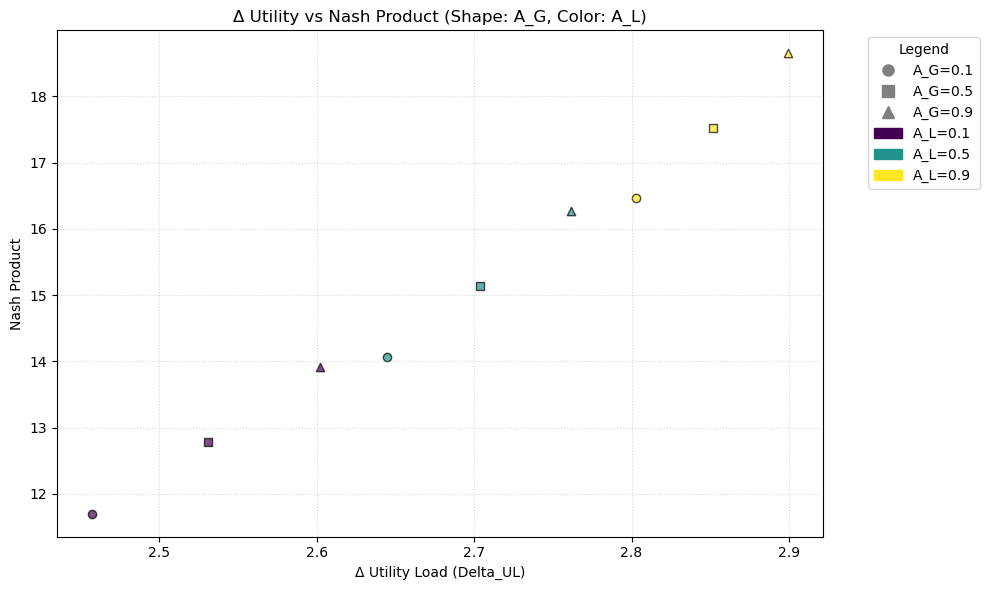

In [ ]:
# Define unique values and markers for A_G
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
unique_AG = np.sort(df_sensitivity["A_G"].unique())
markers = ['o', 's', '^', 'D', 'v', 'P', '*', 'X']  # Add more if needed
marker_dict = {ag: markers[i % len(markers)] for i, ag in enumerate(unique_AG)}

# Define unique colors for A_L using a colormap
unique_AL = np.sort(df_sensitivity["A_L"].unique())
cmap = plt.get_cmap("viridis", len(unique_AL))
color_dict = {al: cmap(i) for i, al in enumerate(unique_AL)}

plt.figure(figsize=(10, 6))

for ag in unique_AG:
    for al in unique_AL:
        mask = (df_sensitivity["A_G"] == ag) & (df_sensitivity["A_L"] == al)
        plt.scatter(
            df_sensitivity.loc[mask, "NashProductLog"],
            df_sensitivity.loc[mask, "Delta_UL"],
            marker=marker_dict[ag],
            color=color_dict[al],
            edgecolor='k',
            alpha=0.7,
            label=None  # We'll handle legend manually
        )

# Create legend handles for A_G (shapes)
shape_handles = [
    mlines.Line2D([], [], color='gray', marker=marker_dict[ag], linestyle='None', markersize=8, label=f"A_G={ag}")
    for ag in unique_AG
]

# Create legend handles for A_L (colors)
color_handles = [
    mpatches.Patch(color=color_dict[al], label=f"A_L={al}")
    for al in unique_AL
]

# Combine and show legend
handles = shape_handles + color_handles
plt.legend(handles=handles, title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Δ Utility Load (Delta_UL)")
plt.ylabel("Nash Product")
plt.title("Δ Utility vs Nash Product (Shape: A_G, Color: A_L)")
plt.grid(True, linestyle=":", alpha=0.5)
plt.tight_layout()
plt.show()